Используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.
Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 
Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте  предварительно применить к признакам standard scaling.

In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def get_logreg(X, y, alpha):
    clf = LogisticRegression(C=alpha, n_jobs = -1)
    clf.fit(X, y)
    return (clf.decision_function(X))

In [3]:
data = load_breast_cancer()

In [8]:
X = data.data
y = data.target

In [14]:
stan = StandardScaler()
X = stan.fit_transform(X)

In [53]:
X.shape

(569, 30)

In [44]:
m_rdm = []
std_rdm = []
for alpha in np.logspace(-2, 2, 5):
    
    rad = []
    for n in tqdm(range(100)):
        asd = []
        for i in range(123):
            r = np.random.uniform(-1, 1, X.shape[0])
            asd.append(np.abs(np.sum(r*get_logreg(X, y, alpha))))
        rad.append(max(asd)/X.shape[0])
    m_rdm.append(np.mean(np.array(rad)))
    std_rdm.append(np.std(np.array(rad))) 
    

A Jupyter Widget

C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [47]:
m_rdm

[0.20556975959930504,
 0.39384606341265527,
 0.6817611422764657,
 1.05780422744838,
 1.708973008620695]

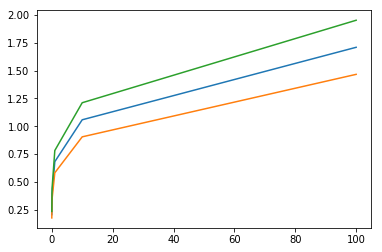

In [51]:
plt.plot(np.logspace(-2, 2, 5), m_rdm) #blue
plt.plot(np.logspace(-2, 2, 5), np.array(m_rdm) - np.array(std_rdm)) #orange
plt.plot(np.logspace(-2, 2, 5), np.array(m_rdm) + np.array(std_rdm)) #green